In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from chemical_space import ChemicalSpace

In [2]:
aryl_scope = ChemicalSpace(['ligand_name'], ['electrophile_id', 'nucleophile_id'], 'datasets/Good_Datasets/aryl-scope-ligand.csv')
aryl_scope.titles = ['Ligand', 'Electrophile', 'Nucleophile']
borylation = ChemicalSpace(['ligand_name', 'solvent'], ['electrophile_id'], 'datasets/Good_Datasets/borylation.csv')
borylation.titles = ['Ligand', 'Solvent', 'Electrophile']
deoxy = ChemicalSpace(['base_name'], ['substrate_name', 'fluoride_name'], 'datasets/Good_Datasets/deoxyf.csv')
deoxy.titles = ['Base', 'Substrate', 'Fluoride']
buchwald_hartwig = ChemicalSpace(['Catalyst','Solvent','Base'], ['Amine','Bromide'], 'datasets/Good_Datasets/buchwald-hartwig.csv')

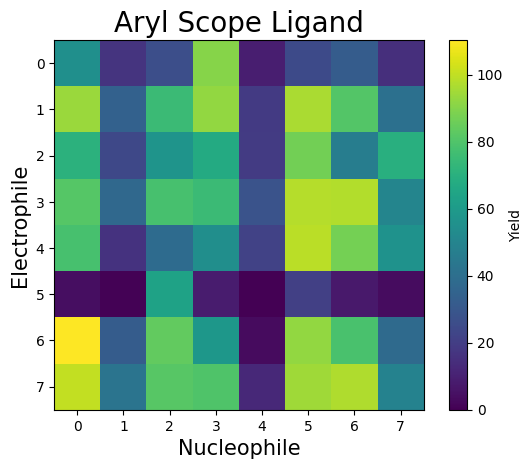

In [3]:
aryl_scope.plot_surface('aryl_scope', 'Yield', 'Aryl Scope Ligand')

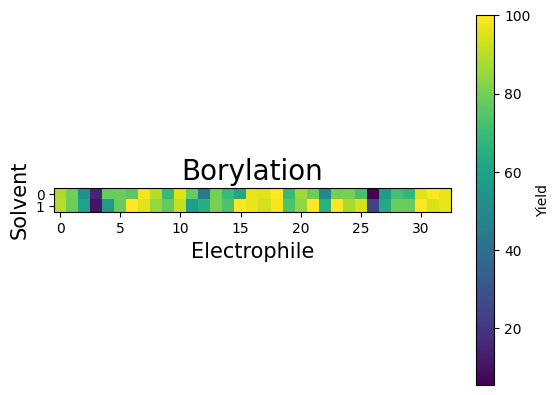

In [4]:
borylation.plot_surface('borylation', 'Yield', 'Borylation')

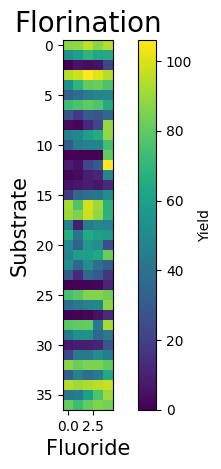

In [5]:
deoxy.plot_surface('deoxyf', 'Yield', 'Florination')

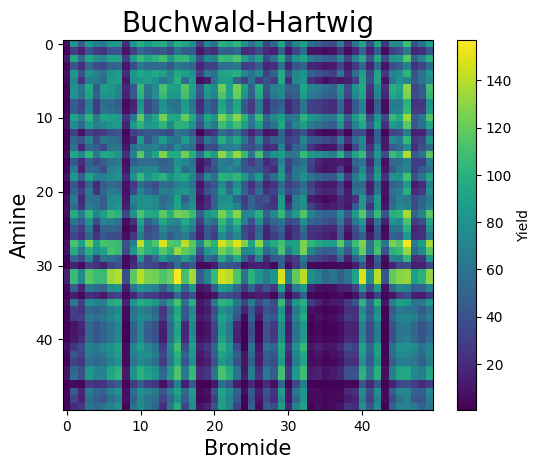

In [6]:
buchwald_hartwig.plot_surface('buchwald_hartwig', 'Yield', 'Buchwald-Hartwig')

In [22]:
with open('metrics_2024-05-15_11:08:37.txt', 'r') as f:
    lines = f.read().splitlines()
    accuracy = lines[0]
    accuracy = accuracy.split('[')[-1][:-1]
    accuracy = [float(x) for x in accuracy.split(', ')]
    precision = lines[1]
    precision = precision.split('[')[-1][:-1]
    precision = [float(x) for x in precision.split(', ')]
    recall = lines[2]
    recall = recall.split('[')[-1][:-1]
    recall = [float(x) for x in recall.split(', ')]

Text(0.5, 0, 'Batch')

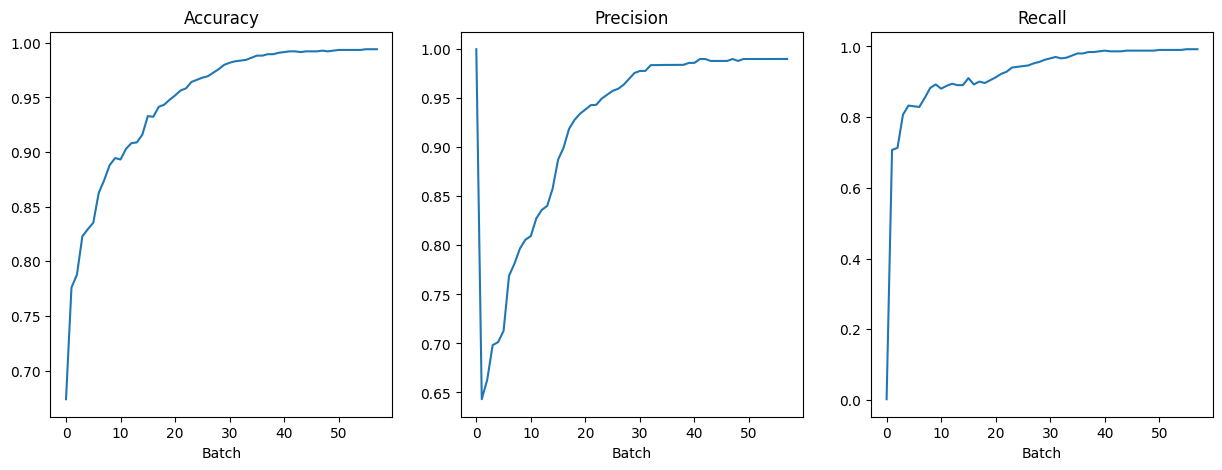

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(accuracy)
ax1.set_title('Accuracy')
ax1.set_xlabel('Batch')
ax2.plot(precision)
ax2.set_title('Precision')
ax2.set_xlabel('Batch')
ax3.plot(recall)
ax3.set_title('Recall')
ax3.set_xlabel('Batch')

In [28]:
BH_df = pd.read_hdf('datasets/share_science_models/final_model_all_y_arr.hdf5',key='df')
print(BH_df)

              114hpset0  110hpset0  115hpset2  116hpset2  115hpset0  \
1_1_1_1_a      0.339354   0.072328   0.642207   0.446863   3.856923   
1_1_1_1_b      0.044080   0.862622   5.943873   3.773814   8.704228   
1_1_1_1_c      0.573446   0.566944   0.744075   0.347473   1.652827   
1_1_1_2_a      1.194119   0.715357   0.234307   0.382247   4.497704   
1_1_1_2_b      2.037962   0.062995   5.621418   5.381562   8.471496   
...                 ...        ...        ...        ...        ...   
50_50_21_2_b  57.396370  39.811962  41.976391  33.123707  61.955162   
50_50_21_2_c   0.573446   0.238012   1.057673   2.964778  -0.995746   
50_50_21_3_a  10.892945  -0.136674  15.546334   0.389491  19.146662   
50_50_21_3_b  70.614944  46.924679  47.002640  48.858818  70.142685   
50_50_21_3_c   0.777323   0.439066   1.463304   2.758016   0.559224   

               10hpset0  100hpset1  104hpset2  109hpset2  102hpset2  ...  \
1_1_1_1_a      0.453000  -0.233525   0.226131  -0.598521  -0.125585  ..

In [29]:
mean_ = BH_df.mean(axis=1)
# std_ = BH_df.std(axis=1)

In [30]:
idxs = BH_df.index.str.split('_').to_list()

In [31]:
flipped_idxs = list(zip(*idxs))

In [32]:
# convert BH predictions into df (then hdf5)
# Amine, Bromide, Catalyst, Solvent, Base, Yield
BH_df['Yield'] = mean_
BH_df['Amine'] = flipped_idxs[0] 
BH_df['Bromide'] = flipped_idxs[1] 
BH_df['Catalyst'] = flipped_idxs[2] 
BH_df['Solvent'] = flipped_idxs[3] 
BH_df['Base'] = flipped_idxs[4]


In [34]:
BH_df_reduced = BH_df[['Amine', 'Bromide', 'Catalyst', 'Solvent', 'Base', 'Yield']]

In [116]:
BH_df_reduced.to_csv('datasets/Good_Datasets/buchwald-hartwig.csv', index=False)

In [54]:
BH_df_reduced["Yield"]

0          0.444733
1          2.994999
2          0.403455
3          0.902547
4          2.549122
            ...    
449995    45.048321
449996     0.379357
449997     6.620378
449998    57.510551
449999     0.491170
Name: Yield, Length: 450000, dtype: float32

In [37]:
BH_df_reduced.index = range(len(BH_df_reduced))